In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('RIVN.csv')

In [4]:
df_price=df[['Date', 'Close', 'Volume', 'Open', 'High', 'Low']]
df_price

,Date,Close,Volume,Open,High,Low
0,2023-03-28,12.960,16396700,13.3300,13.435,12.880
1,2023-03-29,14.240,34237300,13.3200,14.440,13.180
2,2023-03-30,14.400,24339700,14.5500,14.840,14.273
3,2023-03-31,15.480,38244700,14.5400,15.680,14.410
4,2023-04-03,15.230,26714500,15.2800,15.590,14.630
...,...,...,...,...,...,...
248,2024-03-22,10.800,29050300,11.0200,11.070,10.710
249,2024-03-25,10.650,50616100,10.6600,11.130,10.360
250,2024-03-26,10.520,33932000,10.8500,11.035,10.500
251,2024-03-27,10.990,34752300,10.6400,11.070,10.480


In [5]:
df_price['Date'] = pd.to_datetime(df_price['Date'])
df_price = df_price.sort_values(by='Date', ascending=True)
df_price.reset_index(drop=True)

<ipython-input-5-4fba47caf995>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_price['Date'] = pd.to_datetime(df_price['Date'])


,Date,Close,Volume,Open,High,Low
0,2023-03-28,12.960,16396700,13.3300,13.435,12.880
1,2023-03-29,14.240,34237300,13.3200,14.440,13.180
2,2023-03-30,14.400,24339700,14.5500,14.840,14.273
3,2023-03-31,15.480,38244700,14.5400,15.680,14.410
4,2023-04-03,15.230,26714500,15.2800,15.590,14.630
...,...,...,...,...,...,...
248,2024-03-22,10.800,29050300,11.0200,11.070,10.710
249,2024-03-25,10.650,50616100,10.6600,11.130,10.360
250,2024-03-26,10.520,33932000,10.8500,11.035,10.500
251,2024-03-27,10.990,34752300,10.6400,11.070,10.480


Check if there's any null value - False; no null value

In [6]:
df_price.isnull().values.any()

False

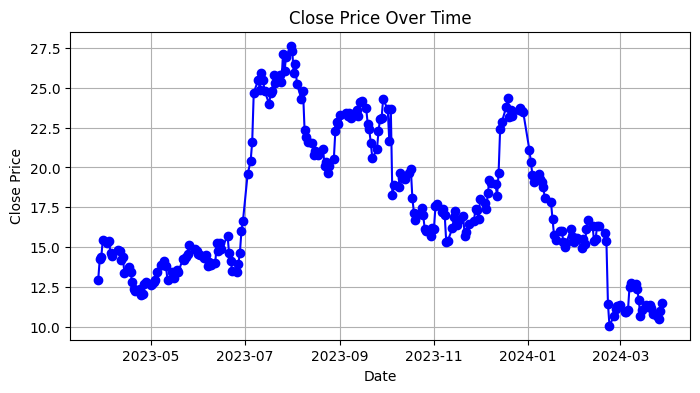

In [7]:
# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Plotting the line graph
plt.figure(figsize=(8, 4))
plt.plot(df['Date'], df['Close'], marker='o', color='b')
plt.title('Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.grid(True)
plt.show()

### LSTM

In [8]:
from sklearn.model_selection import train_test_split
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential, Model
from keras.layers import Embedding, LSTM, Conv1D, MaxPooling1D, Flatten, Dense, Input, concatenate
from keras import layers
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

Epoch 1/10
4/4 [==============================] - 7s 358ms/step - loss: 0.3031 - val_loss: 0.0476
Epoch 2/10
4/4 [==============================] - 0s 24ms/step - loss: 0.2633 - val_loss: 0.0387
Epoch 3/10
4/4 [==============================] - 0s 32ms/step - loss: 0.2268 - val_loss: 0.0310
Epoch 4/10
4/4 [==============================] - 0s 23ms/step - loss: 0.1928 - val_loss: 0.0245
Epoch 5/10
4/4 [==============================] - 0s 31ms/step - loss: 0.1624 - val_loss: 0.0190
Epoch 6/10
4/4 [==============================] - 0s 28ms/step - loss: 0.1348 - val_loss: 0.0146
Epoch 7/10
4/4 [==============================] - 0s 50ms/step - loss: 0.1101 - val_loss: 0.0114
Epoch 8/10
4/4 [==============================] - 0s 27ms/step - loss: 0.0887 - val_loss: 0.0091
Epoch 9/10
4/4 [==============================] - 0s 19ms/step - loss: 0.0696 - val_loss: 0.0077
Epoch 10/10
4/4 [==============================] - 0s 37ms/step - loss: 0.0532 - val_loss: 0.0073


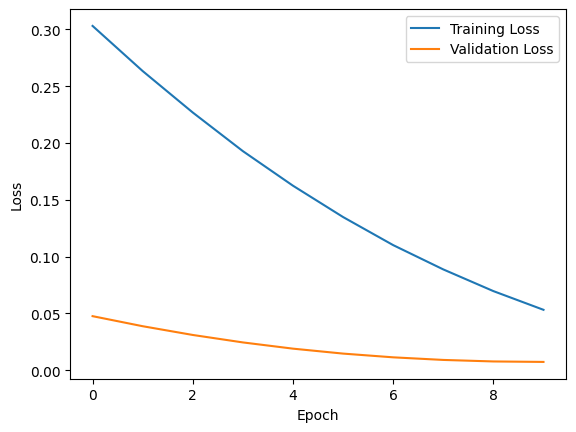

2/2 [==============================] - 1s 5ms/step
Test RMSE: 1.5027482336890097


In [9]:
# Extract features and target
features = df_price[['Close', 'Volume', 'Open', 'High', 'Low']]
target = df_price['Close']
dates = df_price['Date']

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_features = scaler.fit_transform(features)
scaled_target = scaler.fit_transform(target.values.reshape(-1, 1))

# Define the number of time steps
time_steps = 1

# Function to create input sequences and corresponding target values
def create_sequences(data, target, time_steps):
    X, Y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:(i + time_steps)])
        Y.append(target[i + time_steps])
    return np.array(X), np.array(Y)

# Create input sequences and target values
X, Y = create_sequences(scaled_features, scaled_target, time_steps)

# Split the data into training and testing sets
train_X, test_X, train_Y, test_Y = train_test_split(X, Y, test_size=0.2, shuffle=False, random_state=42)

# Reshape input to be [samples, time steps, features]
train_X = np.reshape(train_X, (train_X.shape[0], train_X.shape[1], train_X.shape[2]))
test_X = np.reshape(test_X, (test_X.shape[0], test_X.shape[1], test_X.shape[2]))

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=False, input_shape=(train_X.shape[1], train_X.shape[2])))
#model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(train_X, train_Y, epochs=10, batch_size=64, validation_data=(test_X, test_Y), verbose=1)

# Plot training loss and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Make predictions
predicted_close = model.predict(test_X)

# Invert the scaling for predicted values
predicted_close = scaler.inverse_transform(predicted_close)

# Invert the scaling for actual values
actual_close = scaler.inverse_transform(test_Y.reshape(-1, 1))

# Calculate root mean squared error
test_score = np.sqrt(mean_squared_error(actual_close, predicted_close))
print('Test RMSE:', test_score)

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50)                11200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 11251 (43.95 KB)
Trainable params: 11251 (43.95 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [11]:
predicted_close.shape

(51, 1)

In [12]:
dates.shape

(253,)

In [17]:
last_dates = df_price['Date'].tail(51)

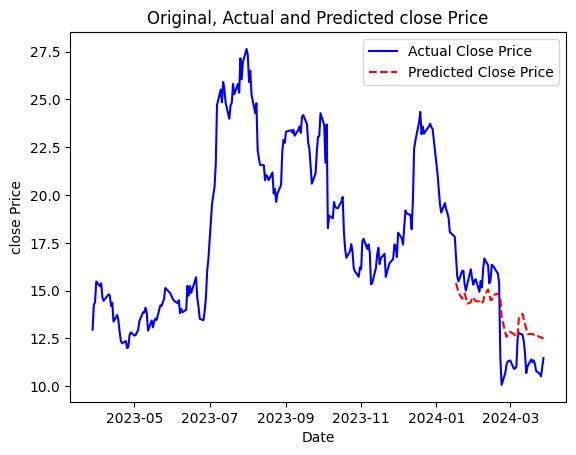

In [18]:
# plot actual vs predicted
plt.plot(dates, target, color='blue', label='Actual Close Price')
plt.plot(last_dates, predicted_close, color='red', linestyle='--', label='Predicted Close Price')
plt.xlabel('Date')
plt.ylabel('close Price')
plt.title('Original, Actual and Predicted close Price')
plt.legend()
plt.show()

Assume that the record has the same time interval